In [4]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn import cluster, tree, decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set matplotlib options
%matplotlib inline
color = '#1F77B4'
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

# Download the dataset
# Read the preprocessed data from a csv file
file = '2. Prepared Data/classification_e-commerce_preprocessed_data.csv'
data = pd.read_csv(file)
print(data.shape)

# Preview data
data.head()

(21639, 42)


,identifierHash,country,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsWished,productsBought,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,socialNbFollowers_UN,socialNbFollows_UN,socialProductsLiked_UN,productsWished_UN,daysSinceLastLogin_UN,language,language_de,language_en,language_es,language_fr,language_it,gender_F,gender_M,country_short_list_Australia,country_short_list_Belgium,country_short_list_Canada,country_short_list_Denmark,country_short_list_France,country_short_list_Germany,country_short_list_Italy,country_short_list_Netherlands,country_short_list_Other,country_short_list_Spain,country_short_list_Sweden,country_short_list_Swiss,country_short_list_UK,country_short_list_US
0,-7877915015908472168,UK,3,8,4,0,0,0,0,0,0,0,1,591,3205,0,1,0,0,19,en,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-8231936648814680895,Denmark,3,8,370,0,0,1,0,0,0,0,1,42,3205,0,1,74,0,1,en,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,5663923945758514393,US,3,8,1,0,0,0,0,0,0,0,1,32,3205,0,1,0,0,1,en,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-3483039296670050121,Germany,3,8,27,0,0,0,0,1,0,1,1,669,3205,0,1,5,0,22,de,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3451396970677435825,Swiss,3,8,0,0,0,9,0,1,1,0,1,463,3205,0,1,0,1,15,en,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
data.columns

Index(['identifierHash', 'country', 'socialNbFollowers', 'socialNbFollows',
       'socialProductsLiked', 'productsListed', 'productsSold',
       'productsWished', 'productsBought', 'hasAnyApp', 'hasAndroidApp',
       'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin', 'seniority',
       'socialNbFollowers_UN', 'socialNbFollows_UN', 'socialProductsLiked_UN',
       'productsWished_UN', 'daysSinceLastLogin_UN', 'language', 'language_de',
       'language_en', 'language_es', 'language_fr', 'language_it', 'gender_F',
       'gender_M', 'country_short_list_Australia',
       'country_short_list_Belgium', 'country_short_list_Canada',
       'country_short_list_Denmark', 'country_short_list_France',
       'country_short_list_Germany', 'country_short_list_Italy',
       'country_short_list_Netherlands', 'country_short_list_Other',
       'country_short_list_Spain', 'country_short_list_Sweden',
       'country_short_list_Swiss', 'country_short_list_UK',
       'country_short_list_US'],

In [6]:
features = ['productsBought', 'productsListed', 'productsSold', 
            'socialNbFollowers_UN', 'socialNbFollows_UN', 'socialProductsLiked_UN', 'productsWished_UN',
            'daysSinceLastLogin_UN', 
            'hasAnyApp','language_de', 'language_en', 'language_es', 'language_fr', 'language_it'] 
           

df_features=data[features + ['country']]

# Preview data
df_features.head()

,productsBought,productsListed,productsSold,socialNbFollowers_UN,socialNbFollows_UN,socialProductsLiked_UN,productsWished_UN,daysSinceLastLogin_UN,hasAnyApp,language_de,language_en,language_es,language_fr,language_it,country
0,0,0,0,0,1,0,0,19,0,0,1,0,0,0,UK
1,0,0,0,0,1,74,0,1,0,0,1,0,0,0,Denmark
2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,US
3,0,0,0,0,1,5,0,22,1,1,0,0,0,0,Germany
4,0,0,0,0,1,0,1,15,1,0,1,0,0,0,Swiss


In [7]:
df = df_features.copy()
#df[features] = StandardScaler().fit_transform(df[features])
df[features] = RobustScaler().fit_transform(df[features])
X = df[features] 

# Principal component analysis for visualization
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

df.head()

,productsBought,productsListed,productsSold,socialNbFollowers_UN,socialNbFollows_UN,socialProductsLiked_UN,productsWished_UN,daysSinceLastLogin_UN,hasAnyApp,language_de,language_en,language_es,language_fr,language_it,country
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,UK
1,0.0,0.0,0.0,0.0,0.0,74.0,0.0,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,Denmark
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,US
3,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.45,1.0,1.0,-1.0,0.0,0.0,0.0,Germany
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.10,1.0,0.0,0.0,0.0,0.0,0.0,Swiss


In [ ]:
# StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

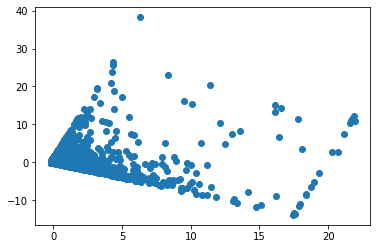

In [11]:
plt.scatter(X_pca[:,0],X_pca[:,1])

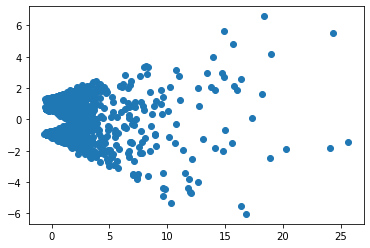

In [12]:
df = df_features.copy()
df[features] = StandardScaler().fit_transform(df[features])
X = df[features] 

# Principal component analysis for visualization
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

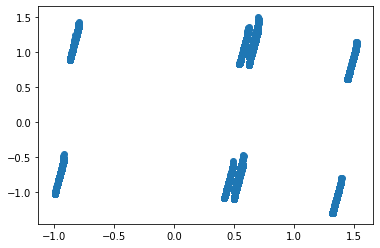

In [13]:
df = df_features.copy()
df[features] = MinMaxScaler().fit_transform(df[features])
X = df[features] 

# Principal component analysis for visualization
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

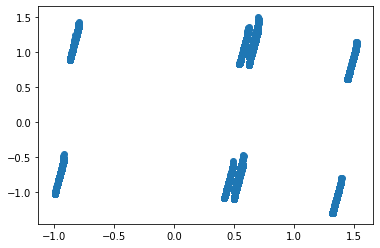

In [14]:
df = df_features.copy()
df[features] = MaxAbsScaler().fit_transform(df[features])
X = df[features] 

# Principal component analysis for visualization
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

In [54]:
# Download the dataset
# Source https://data.world/jfreex/e-commerce-users-of-a-french-c2c-fashion-store
fl = '2. Prepared Data/6M-0K-99K.users.dataset.public.csv'
data = pd.read_csv(fl)

In [55]:
data.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [60]:
features = ['productsBought', 'productsListed', 'productsSold', 
            'socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsWished',
            'daysSinceLastLogin']

#df_features=data[features + ['country']]
df_features=data[features]

# Preview data
df_features.head()

TypeError: head() got an unexpected keyword argument 'bins'

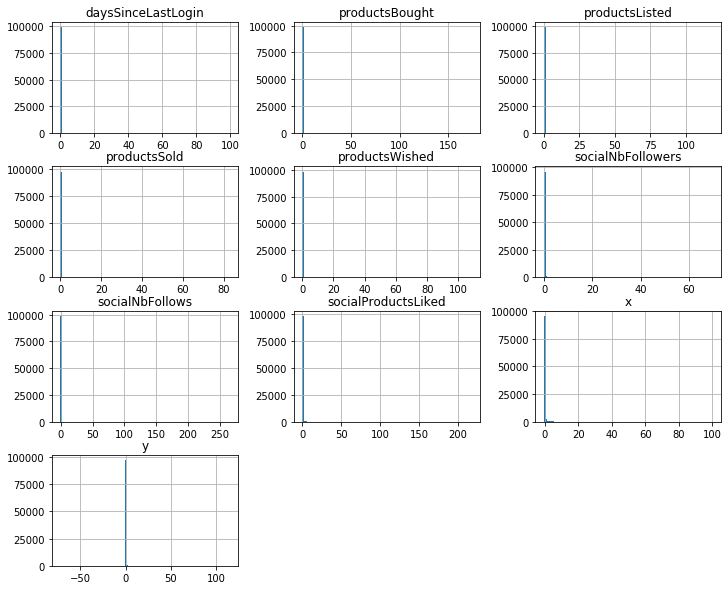

In [61]:
df.hist(figsize=(12,10), bins=100)
plt.show()

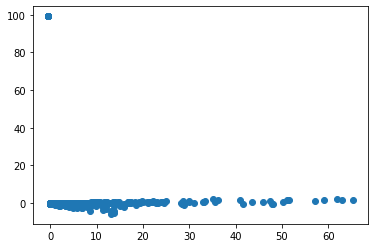

In [44]:
df = df_features.copy()
df[features] = MaxAbsScaler().fit_transform(df[features])
X = df[features] 

# Principal component analysis for visualization
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

In [ ]:
# StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

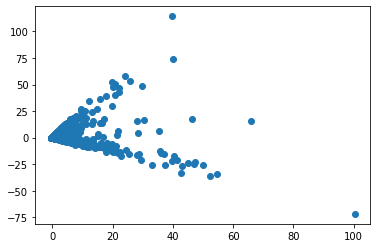

In [45]:
df = df_features.copy()
df[features] = StandardScaler().fit_transform(df[features])
X = df[features] 

# Principal component analysis for visualization
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

In [46]:
df['x']=X_pca[:,0]
df['y']=X_pca[:,1]

In [52]:
filter_out = df[df['x']>60].index
data.iloc[filter_out]

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
80459,-6084494630835324904,user,France,fr,3,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,197,2855,95.17,7.93,fr
98781,-856562165878841814,user,Royaume-Uni,en,3,8,178,0,0,0.0,7,2,F,2,mrs,False,False,False,True,14,3204,106.80,8.90,gb


In [53]:
filter_out = df[df['y']>100].index
data.iloc[filter_out]

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
79937,7096754274435572445,user,Italie,it,4,8,0,0,0,0.0,0,0,F,2,mrs,False,False,False,True,28,2855,95.17,7.93,it


In [ ]:
### 37463,50398, 80459,98781,79937

In [38]:
data.shape

(98913, 24)

In [37]:
data.iloc[filter_out]

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
37463,2119852871524485845,user,France,fr,353,8268,5595,5,15,66.0,875,0,F,2,mrs,True,False,True,False,31,3198,106.6,8.88,fr
50398,3718185418791028367,user,Italie,it,744,13764,51671,0,104,85.0,1842,0,F,2,mrs,True,False,True,False,14,3195,106.5,8.88,it


In [41]:
data.drop(filter_out, inplace=True)

KeyError: '[37463 50398] not found in axis'

In [42]:
data.shape

(98911, 24)

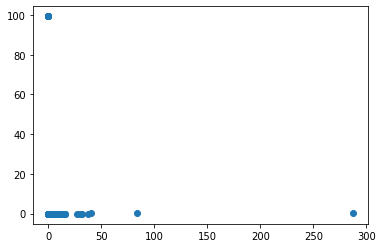

In [23]:
df = df_features.copy()
df[features] = RobustScaler().fit_transform(df[features])
X = df[features] 

# Principal component analysis for visualization
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()

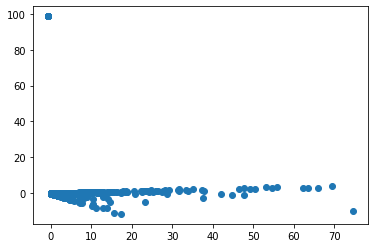

In [24]:
df = df_features.copy()
df[features] = MinMaxScaler().fit_transform(df[features])
X = df[features] 

# Principal component analysis for visualization
pca = PCA(n_components=2, whiten=True)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])
plt.show()